# Geothermal Heat Flux
**Description:**  
Geothermal heat flux estimates from various sources for Antarctica, both point-measurements and regional gridded data. 

**Datasets:** 

Martos, Yasmina M. “Antarctic Geothermal Heat Flux Distribution and Estimated Curie Depths, Links to Gridded Files.” Supplement to: Martos, Yasmina M; Catalán, Manuel; Jordan, Tom A; Golynsky, Alexander V; Golynsky, Dmitry A; Eagles, Graeme; Vaughan, David G (2017): Heat Flux Distribution of Antarctica Unveiled. Geophysical Research Letters, 44(22), 11417-11426, Https://Doi.Org/10.1002/2017GL075609. PANGAEA, 2017. https://doi.org/10.1594/PANGAEA.882503.

Lösing, Mareen, and Jörg Ebbing. “Predicted Antarctic Heat Flow and Uncertainties Using Machine Learning.” PANGAEA, 2021. https://doi.org/10.1594/PANGAEA.930237.

Stål, Tobias, Anya M. Reading, Jacqueline A. Halpin, and Joanne Whittaker. “Antarctic Geothermal Heat Flow Model: Aq1.” PANGAEA, 2020. https://doi.org/10.1594/PANGAEA.924857.

**Associated papers:**

An, Meijian, Douglas A. Wiens, Yue Zhao, Mei Feng, Andrew Nyblade, Masaki Kanao, Yuansheng Li, Alessia Maggi, and Jean‐Jacques Lévêque. “Temperature, Lithosphere‐asthenosphere Boundary, and Heat Flux beneath the Antarctic Plate Inferred from Seismic Velocities.” Journal of Geophysical Research: Solid Earth 120, no. 12 (December 2015): 8720–42. https://doi.org/10.1002/2015JB011917.

Martos, Yasmina M., Manuel Catalán, T. A. Jordan, Alexander Golynsky, Dmitry Golynsky, Graeme Eagles, and David G. Vaughan. “Heat Flux Distribution of Antarctica Unveiled.” Geophysical Research Letters 44 (November 28, 2017): 1–10. https://doi.org/10.1002/2017GL075609.

Burton-Johnson, Alex, Ricarda Dziadek, and Carlos Martin. “Geothermal Heat Flow in Antarctica: Current and Future Directions.” The Cryosphere Discussions, 2020, 1–45. https://doi.org/10.5194/tc-2020-59.

Lösing, M., and J. Ebbing. “Predicting Geothermal Heat Flow in Antarctica With a Machine Learning Approach.” Journal of Geophysical Research: Solid Earth 126, no. 6 (June 2021). https://doi.org/10.1029/2020JB021499.

Stål, Tobias, Anya M. Reading, Jacqueline A. Halpin, and Joanne M. Whittaker. “Antarctic Geothermal Heat Flow Model: Aq1.” Geochemistry, Geophysics, Geosystems 22, no. 2 (February 2021). https://doi.org/10.1029/2020GC009428.

Shen, Weisen, Douglas A. Wiens, Andrew J. Lloyd, and Andrew A. Nyblade. “A Geothermal Heat Flux Map of Antarctica Empirically Constrained by Seismic Structure.” Geophysical Research Letters 47, no. 14 (2020). https://doi.org/10.1029/2020GL086955.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions, utils

In [19]:
version_names = [
    "an-2015",
    "martos-2017",
    "burton-johnson-2020",
    "losing-ebbing-2021",
    "aq1",
    "shen-2020",
]

grids = []
for name in version_names:
    data = fetch.ghf(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print(data)
    print("##########")
    # fig = maps.plot_grd(
    #     data, title=name
    # )
    # fig.show()

Info for an-2015
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 26.5443553925
grid zmax: 102.38230896
grid registration: g
<xarray.DataArray 'ghf' (y: 1333, x: 1333)> Size: 7MB
dask.array<open_dataset-ghf, shape=(1333, 1333), dtype=float32, chunksize=(334, 334), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 11kB -3.33e+06 -3.325e+06 ... 3.325e+06 3.33e+06
  * y        (y) float64 11kB -3.33e+06 -3.325e+06 ... 3.325e+06 3.33e+06
Attributes:
    Conventions:   CF-1.7
    actual_range:  [26.544355392456055, 102.38230895996094]
    description:   
    history:       gmt grdsample @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G...
    long_name:     z
    title:         
##########
Info for martos-2017


/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1655: RuntimeWarning: Grid may have irregular spacing in the 'x' dimension, but GMT only supports regular spacing. Calculated regular spacing 15042.97994269341 is assumed in the 'x' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)


grid spacing: 15000.0 m
grid region: (-2535000.0, 2715000.0, -2130000.0, 2220000.0)
grid zmin: 42.6263694763
grid zmax: 240.510910034
grid registration: g
<xarray.DataArray 'ghf' (y: 291, x: 350)> Size: 815kB
dask.array<open_dataset-ghf, shape=(291, 350), dtype=float64, chunksize=(146, 175), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 3kB -2535000 -2505000 -2490000 ... 2700000 2715000
  * y        (y) int64 2kB -2130000 -2115000 -2100000 ... 2205000 2220000
##########
Info for burton-johnson-2020
grid spacing: 17000.0 m
grid region: (-2543500.0, 2624500.0, -2121500.0, 2213500.0)
grid zmin: 42.2533454895
grid zmax: 106.544433594
grid registration: p
<xarray.DataArray 'band_data' (y: 257, x: 304)> Size: 625kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, n

/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:656: RuntimeWarning: The definition of projected CRS EPSG:3031 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
  status = c_call_module(self.session_pointer, module.encode(), mode, argv)


grid spacing: 5000.0 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: 31.1965789795
grid zmax: 156.956375122
grid registration: g
<xarray.DataArray 'ghf' (y: 1121, x: 1121)> Size: 5MB
dask.array<open_dataset-ghf, shape=(1121, 1121), dtype=float32, chunksize=(281, 281), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 9kB -2.8e+06 -2.795e+06 -2.79e+06 ... 2.795e+06 2.8e+06
  * y        (y) float64 9kB -2.8e+06 -2.795e+06 -2.79e+06 ... 2.795e+06 2.8e+06
Attributes:
    Conventions:   CF-1.7
    actual_range:  [nan, nan]
    description:   
    grid_mapping:  spatial_ref
    history:       gmt surface @GMTAPI@-S-I-D-V-T-N-000000 -G@GMTAPI@-S-O-G-G...
    long_name:     z
    title:         Data gridded with continuous surface splines in tension
##########


/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1655: RuntimeWarning: Grid may have irregular spacing in the 'X' dimension, but GMT only supports regular spacing. Calculated regular spacing 20071.685546875 is assumed in the 'X' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)
/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1655: RuntimeWarning: Grid may have irregular spacing in the 'Y' dimension, but GMT only supports regular spacing. Calculated regular spacing 20071.685546875 is assumed in the 'Y' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)


Info for aq1
grid spacing: 20000.0 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: 24.3441848755
grid zmax: 195.456390381
grid registration: g
<xarray.DataArray 'z' (y: 281, x: 281)> Size: 316kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(281, 281), dtype=float32)
Coordinates:
  * y        (y) float64 2kB -2.8e+06 -2.78e+06 -2.76e+06 ... 2.78e+06 2.8e+06
  * x        (x) float64 2kB -2.8e+06 -2.78e+06 -2.76e+06 ... 2.78e+06 2.8e+06
Attributes:
    Conventions:   CF-1.7
    title:         
    history:       gmt grdsample @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G...
    description:   
    actual_range:  [ 24.34418488 195.45639038]
    long_name:     z
##########
Info for shen-2020
grid spacing: 10000.0 m
grid region:

In [3]:
burton_johnson_points = fetch.ghf(
    version="burton-johnson-2020",
    points=True,
)
burton_johnson_points

100%|█████████████████████████████████████| 54.1k/54.1k [00:00<00:00, 47.9MB/s]


,lat,lon,Station ID,top (m),bot (m),grad,k(W/mK),GHF,err,Elevation (m.a.s.l.),Reference,DOI,DataQuality,Method,Comment,x,y
0,-56.5667,34.1833,C11-44,0.0,11,300,0.77,229.0,NaN,-5372.0,Anderson1977,https://doi.org/10.1594/PANGAEA.796541,S3,Unconsolidated sediments,NaN,2.098568e+06,3.089886e+06
1,-56.3000,51.9667,C11-45,0.0,11,19,0.72,14.0,NaN,-5386.0,Anderson1977,https://doi.org/10.1594/PANGAEA.796541,S3,Unconsolidated sediments,NaN,2.966827e+06,2.320718e+06
2,-52.7000,54.0000,C11-47,0.0,11,90,0.72,65.0,NaN,-4585.0,Anderson1977,https://doi.org/10.1594/PANGAEA.796541,S3,Unconsolidated sediments,NaN,3.394980e+06,2.466597e+06
3,-50.4667,59.5833,C11-48,0.0,7,360,0.75,271.0,NaN,-4839.0,Anderson1977,https://doi.org/10.1594/PANGAEA.796541,S3,Unconsolidated sediments,NaN,3.852572e+06,2.261800e+06
4,-50.3167,61.2000,C11-49,0.0,11,120,0.68,81.0,NaN,-4640.0,Anderson1977,https://doi.org/10.1594/PANGAEA.796541,S3,Unconsolidated sediments,NaN,3.930916e+06,2.161039e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,-61.1000,-19.8500,IO15-49,NaN,10,,0.81,84.0,,-4764.0,Zlotnicki1980,https://doi.org/10.1029/GL007i006p00421,S2,Unconsolidated sediments,bot (m) from depths in https://doi.org/10.1029...,-1.088517e+06,3.015213e+06
444,-66.2500,-33.0667,IO15-52,NaN,11,,0.86,64.0,,-4933.0,Zlotnicki1980,https://doi.org/10.1029/GL007i006p00421,S2,Unconsolidated sediments,bot (m) from depths in https://doi.org/10.1029...,-1.427655e+06,2.192803e+06
445,-64.0667,-36.9500,IO15-55,NaN,6,,1.25,175.0,,-4797.0,Zlotnicki1980,https://doi.org/10.1029/GL007i006p00421,S2,Unconsolidated sediments,bot (m) from depths in https://doi.org/10.1029...,-1.722133e+06,2.289502e+06
446,-63.1000,-38.4500,IO15-56,NaN,8,,1.03,105.0,,-4495.0,Zlotnicki1980,https://doi.org/10.1029/GL007i006p00421,S2,Unconsolidated sediments,bot (m) from depths in https://doi.org/10.1029...,-1.850246e+06,2.330250e+06


/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1655: RuntimeWarning: Grid may have irregular spacing in the 'x' dimension, but GMT only supports regular spacing. Calculated regular spacing 15042.97994269341 is assumed in the 'x' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)
/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:656: RuntimeWarning: The definition of projected CRS EPSG:3031 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
  status = c_call_module(self.session_pointer, module.encode(), mode, argv)


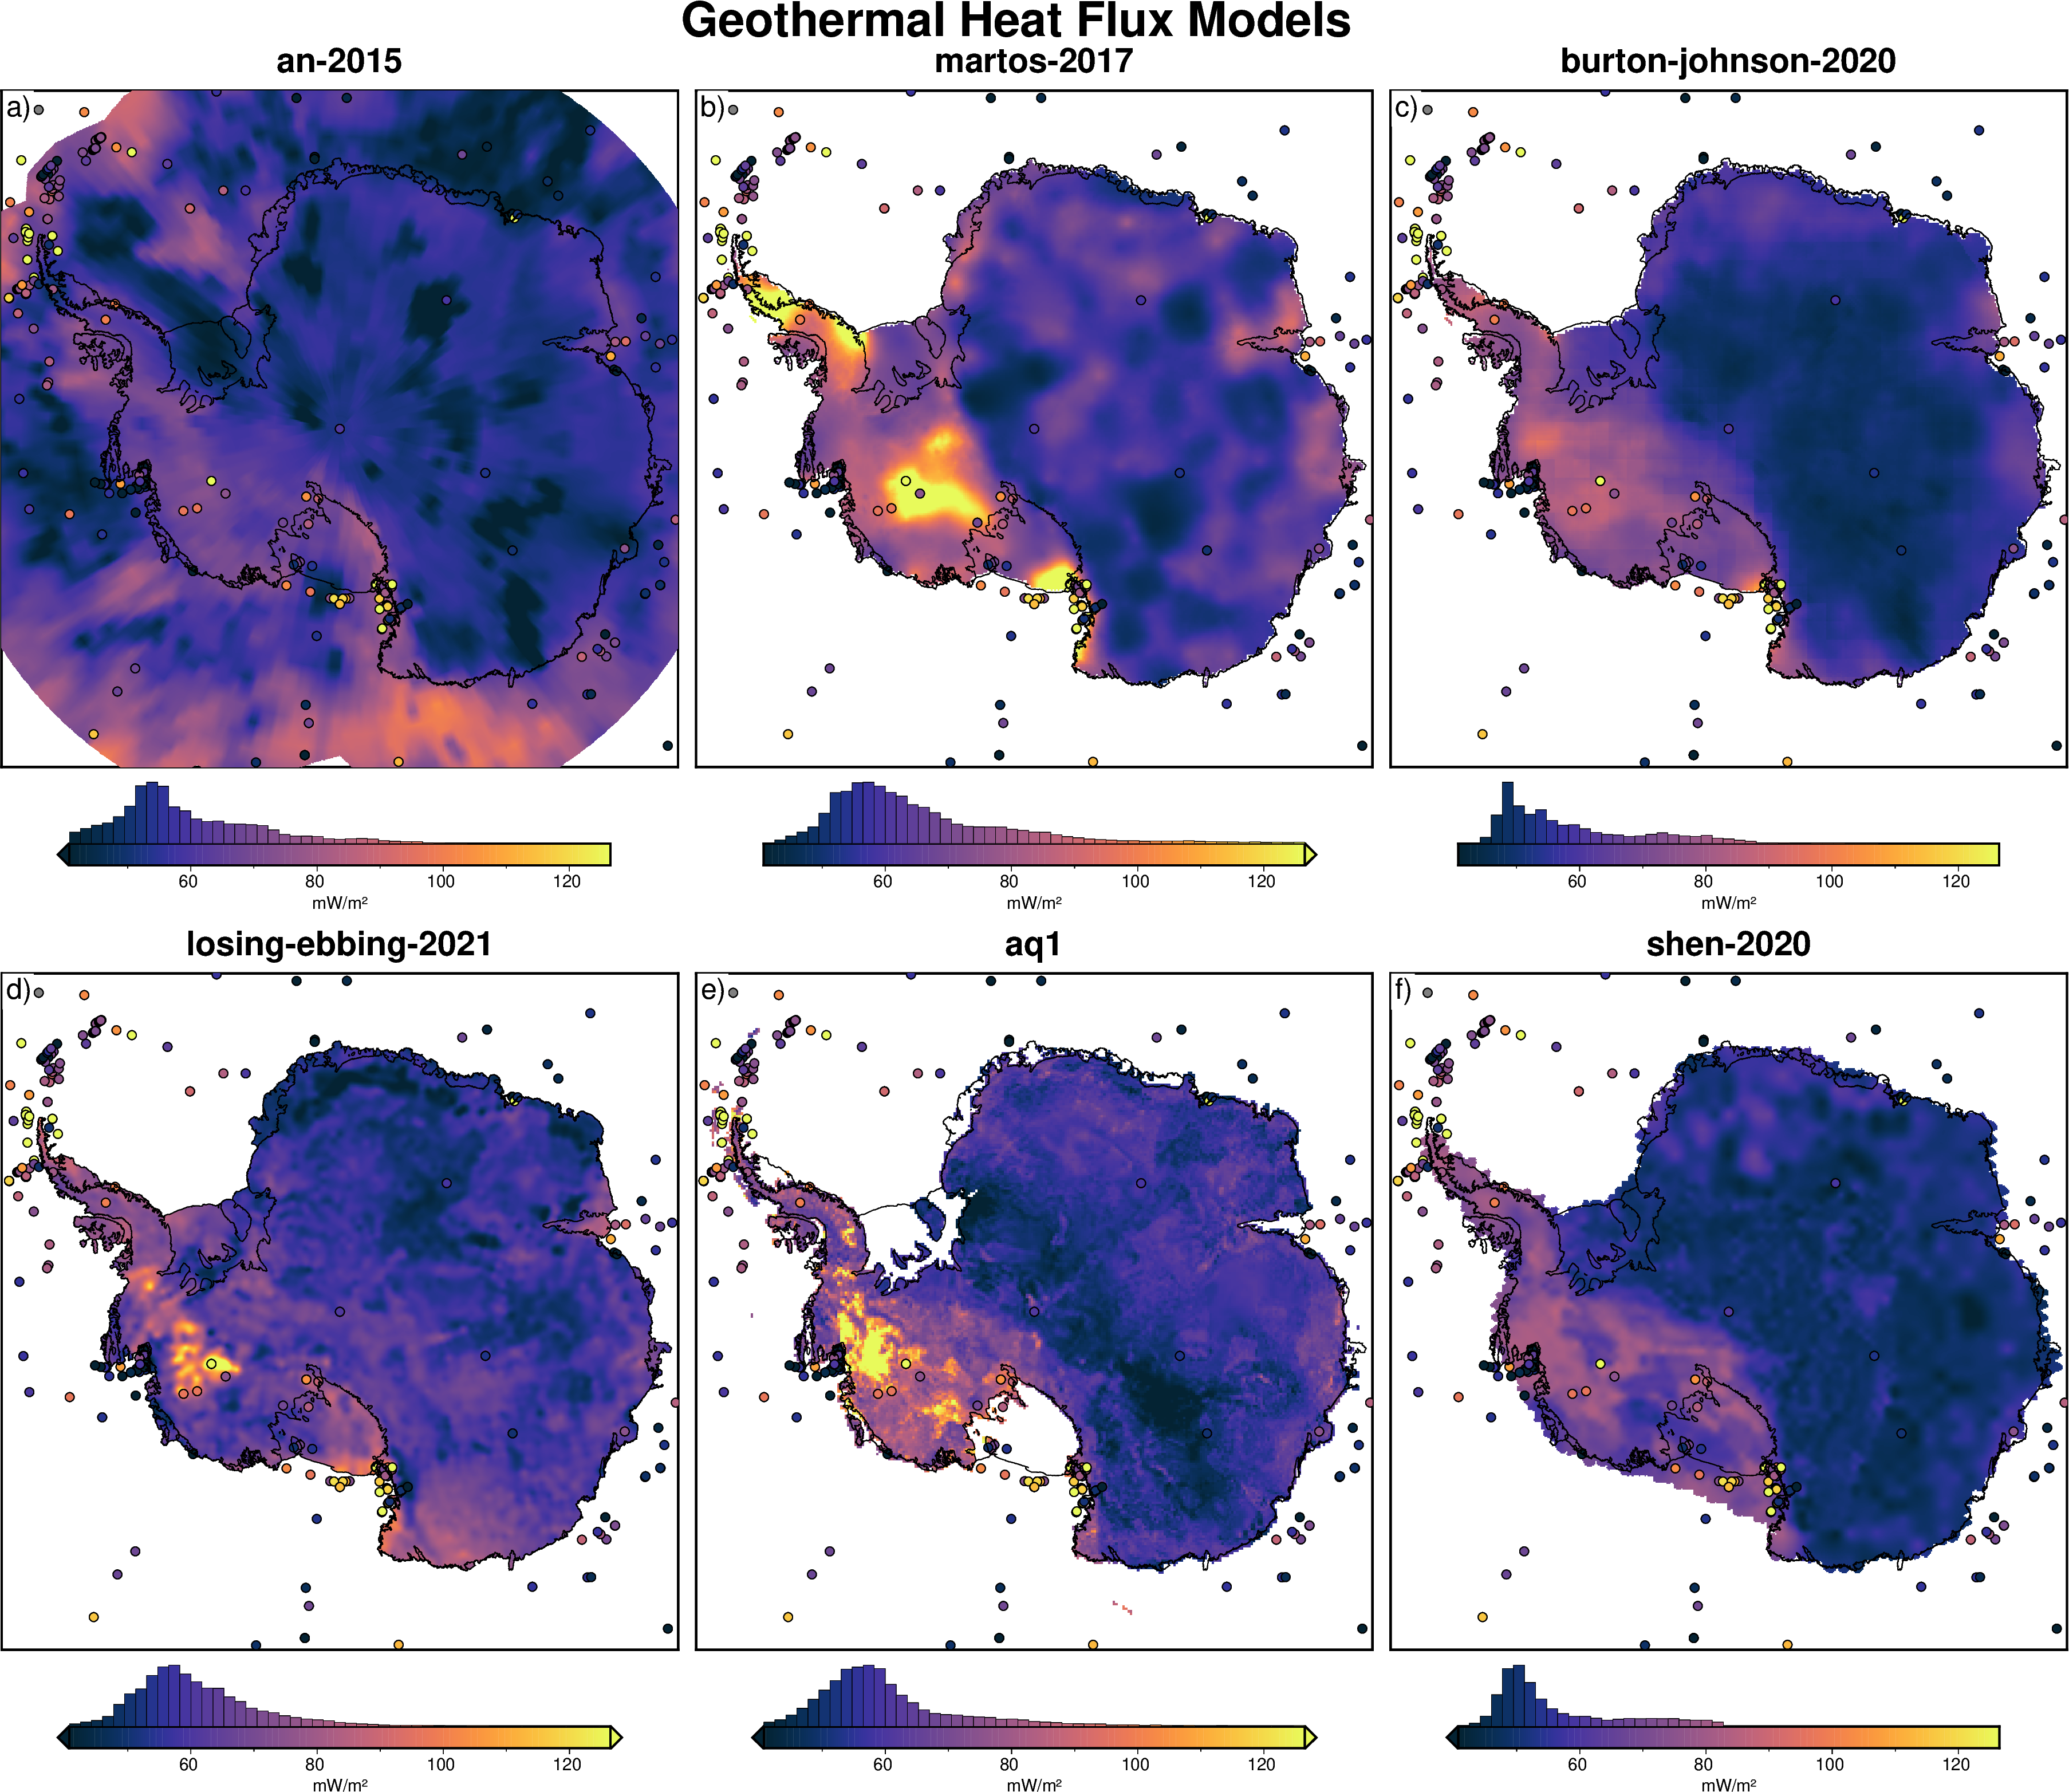

In [20]:
cpt_lims = utils.get_combined_min_max(grids, robust=True)

fig = maps.subplots(
    grids,
    region=regions.antarctica,
    fig_title="Geothermal Heat Flux Models",
    titles=version_names,
    cbar_label="mW/m²",
    coast=True,
    cmap="thermal",
    cpt_lims=cpt_lims,
    hemisphere="south",
    points=burton_johnson_points,
    points_cmap=True,
    points_fill="GHF",
    points_pen=".6p,black",
    hist=True,
)

fig.show(dpi=200)